#**ChatGPT para Data Science (DS) e Machine Learning (ML)**
Será usado o ChatGPT para gerar código em Python para ler e analisar os dados da base de dados conhecida como `Census.csv`.

## Análise e Exploração de Dados

In [ ]:
import pandas as pd

# Carregar o arquivo "census.csv" usando o Pandas
file_path = '/content/census.csv'  # Certifique-se de fornecer o caminho correto para o arquivo
data = pd.read_csv(file_path)

# Mostrar as primeiras linhas do DataFrame para ter uma ideia dos dados
print("Visualização das primeiras linhas do arquivo:")
print(data.head())

# Mostrar estatísticas básicas de todas as colunas numéricas
print("\nEstatísticas básicas:")
print(data.describe())

# Mostrar informações sobre as colunas, seus tipos de dados e se há valores nulos
print("\nInformações sobre as colunas:")
print(data.info())

Visualização das primeiras linhas do arquivo:
   age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-count

In [ ]:
# Mostrar amostra das primeiras linhas
print("Amostra das primeiras linhas:")
print(data.head())

# Estatísticas das colunas numéricas
print("\nEstatísticas das colunas numéricas:")
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
print(numeric_columns.describe())

# Contagem de valores únicos para colunas categóricas
categorical_columns = data.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = data[column].nunique()
    print(f"\nContagem de valores únicos para a coluna '{column}': {unique_values}")

# Contagem de valores únicos para a coluna classe (income)
income_counts = data['income'].value_counts()
print("\nContagem de valores únicos para a coluna 'income':")
print(income_counts)


Amostra das primeiras linhas:
   age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0  

In [ ]:
# Mostrar os tipos de dados das colunas
print("Tipos de dados das colunas:")
print(data.dtypes)


Tipos de dados das colunas:
age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object


In [13]:
# Verificar se existem dados faltantes em cada coluna
missing_data = data.isnull().sum()
print("Verificação de dados faltantes:")
print(missing_data)

Verificação de dados faltantes:
age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64


In [14]:
# Verificar se existem valores "?" nas colunas categóricas
categorical_columns = data.select_dtypes(include=['object'])
question_mark_count = (categorical_columns == '?').sum()
print("Verificação de valores '?' nas colunas categóricas:")
print(question_mark_count)

Verificação de valores '?' nas colunas categóricas:
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64


In [15]:
# Determinando colunas com outliers usando o método IQR
outliers_dict = {}

# Iterando por cada coluna para identificar os outliers
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Apenas para colunas numéricas
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_dict[column] = outliers.shape[0]

# Exibindo o número de outliers por coluna
print("Número de outliers por coluna:")
for col, num_outliers in outliers_dict.items():
    print(f"Coluna '{col}': {num_outliers} outliers")

Número de outliers por coluna:
Coluna 'age': 143 outliers
Coluna 'final-weight': 992 outliers
Coluna 'education-num': 1198 outliers
Coluna 'capital-gain': 2712 outliers
Coluna 'capital-loos': 1519 outliers
Coluna 'hour-per-week': 9008 outliers


## Gráficos com Atributos Categóricos

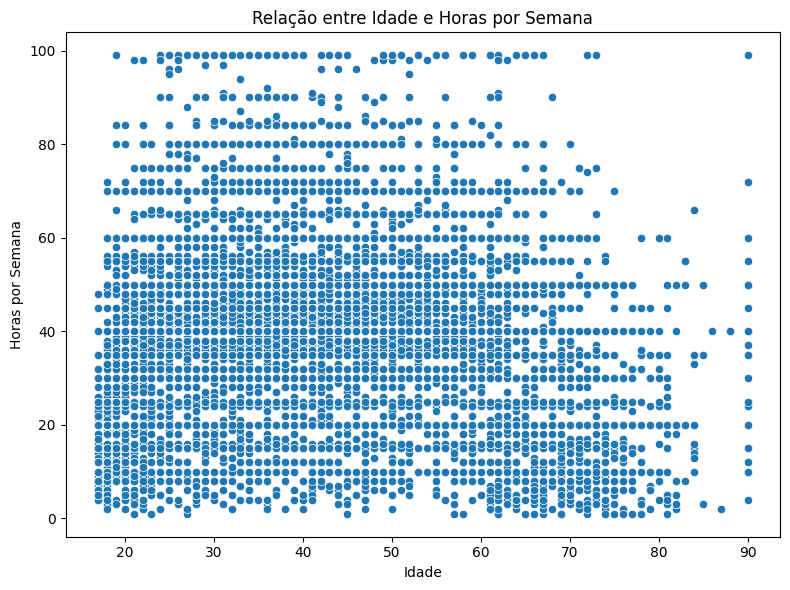

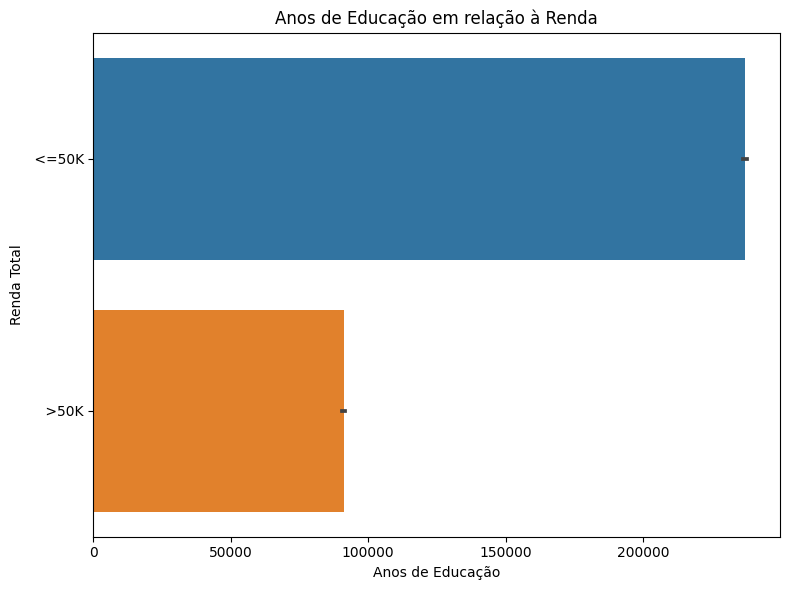

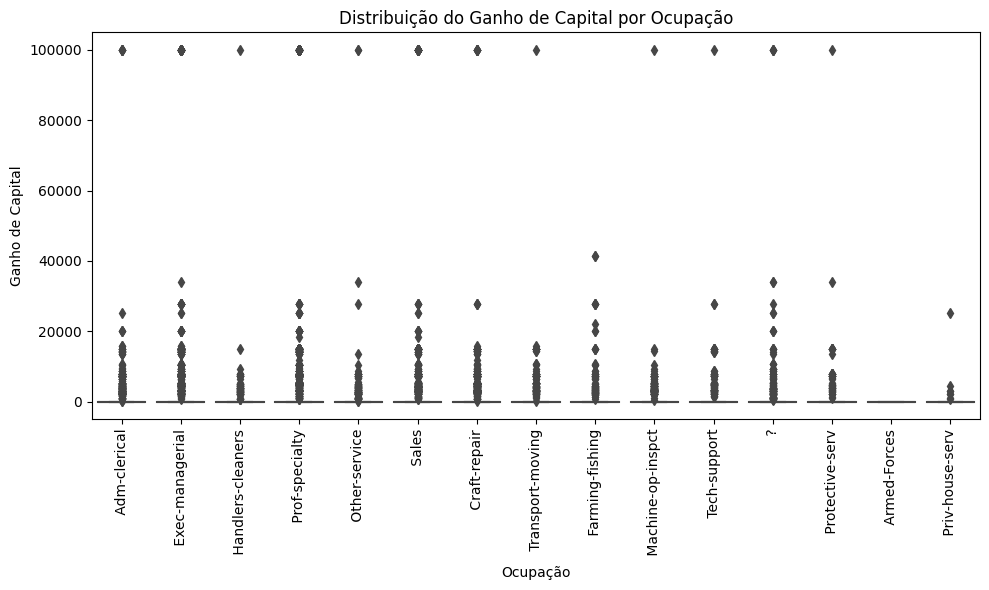

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico de Dispersão: Idade x Horas por Semana
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hour-per-week', data=data)
plt.title('Relação entre Idade e Horas por Semana')
plt.xlabel('Idade')
plt.ylabel('Horas por Semana')
plt.tight_layout()
plt.show()

# 2. Gráfico de Barras: Anos de Educação x Renda (Income)
plt.figure(figsize=(8, 6))
sns.barplot(x='education-num', y='income', data=data, estimator=sum)
plt.title('Anos de Educação em relação à Renda')
plt.xlabel('Anos de Educação')
plt.ylabel('Renda Total')
plt.tight_layout()
plt.show()

# 3. Gráfico de Caixas (Boxplot): Ganho de Capital x Ocupação
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupation', y='capital-gain', data=data)
plt.title('Distribuição do Ganho de Capital por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Ganho de Capital')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

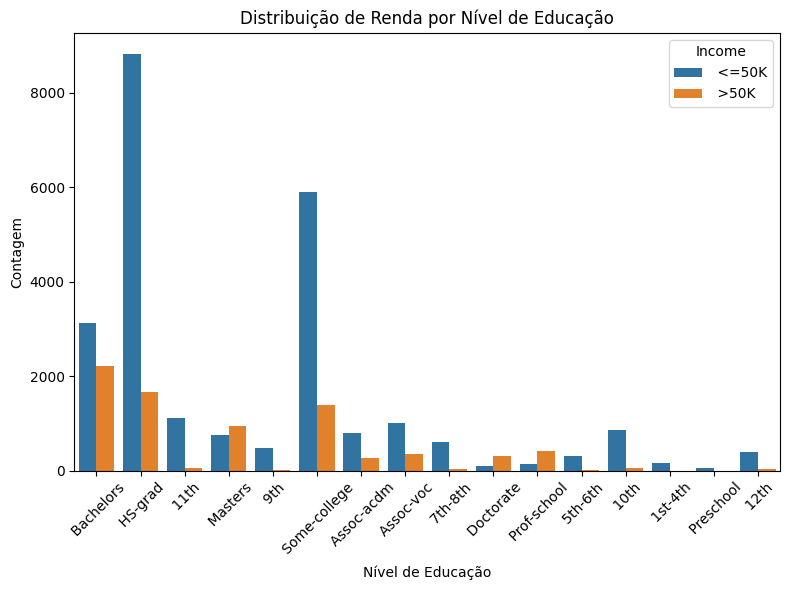

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de uso do gráfico de barras para visualizar a relação entre uma coluna categórica e "income"
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Distribuição de Renda por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

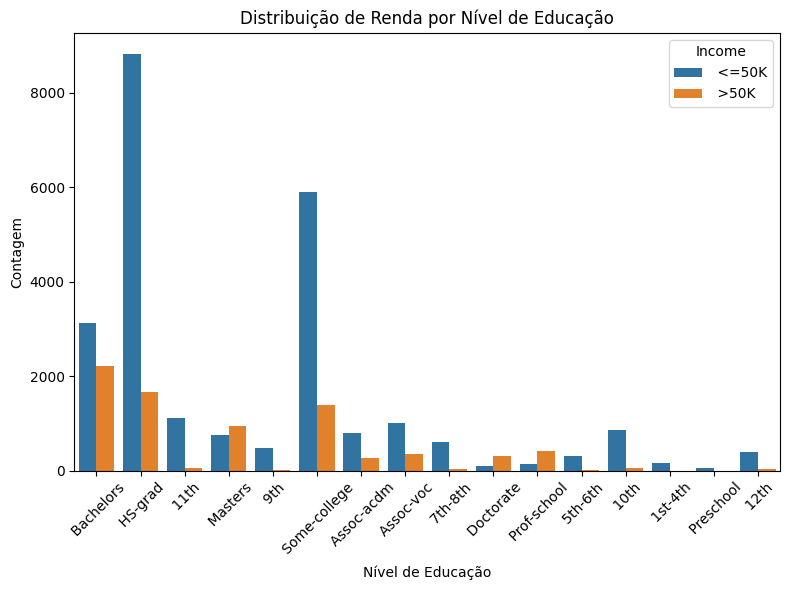

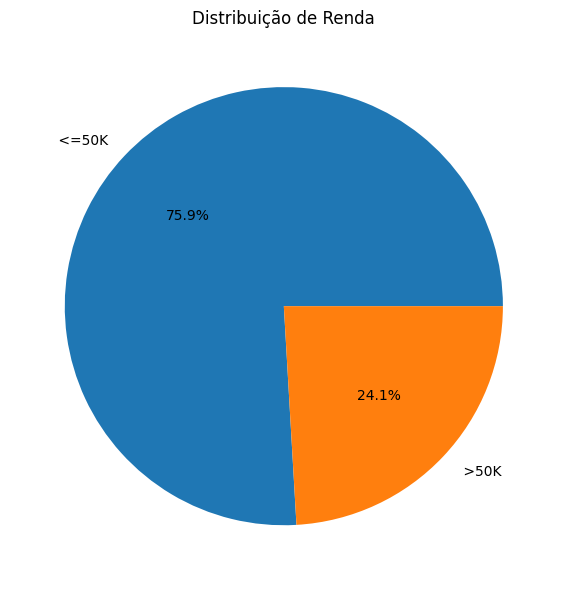

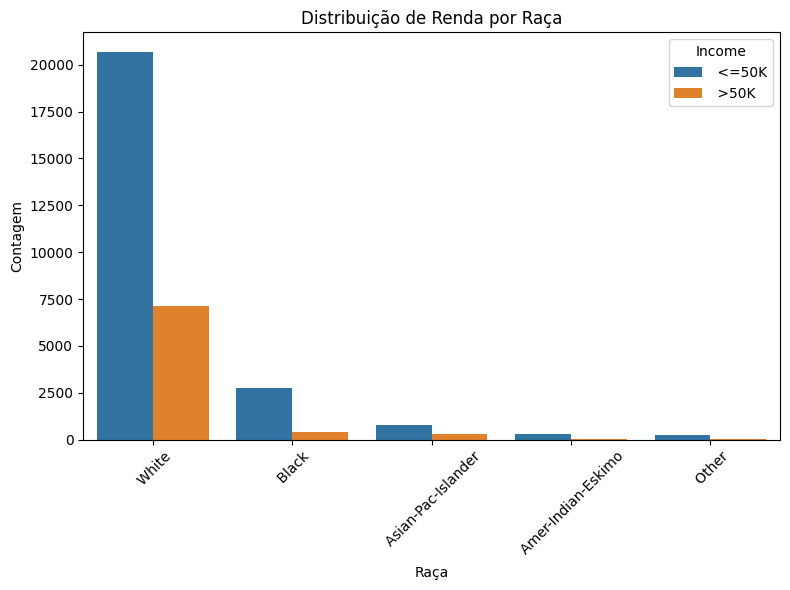

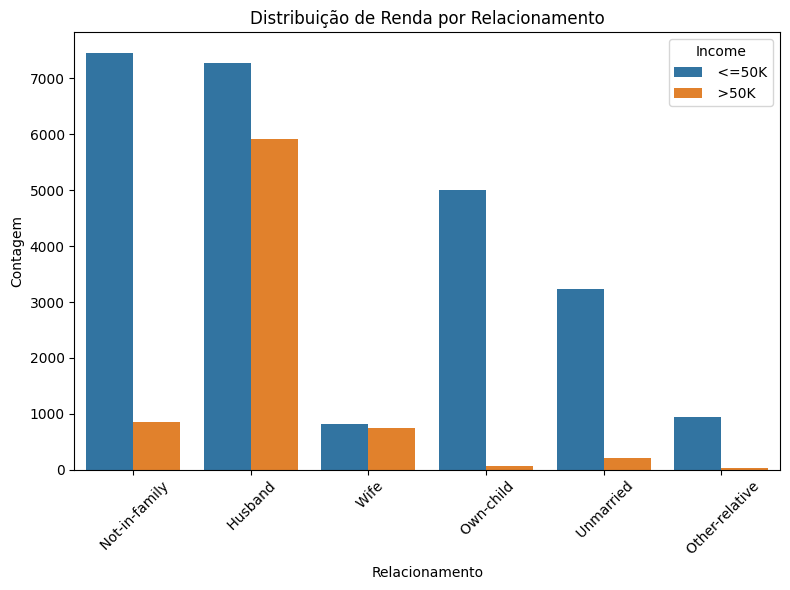

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Barras (Barplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Distribuição de Renda por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Gráfico de Pizza (Pie Chart)
plt.figure(figsize=(8, 6))
data['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição de Renda')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Gráfico de Setores Empilhados (Stacked Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='income', data=data)
plt.title('Distribuição de Renda por Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Gráfico de Contagem por Categoria (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='relationship', hue='income', data=data)
plt.title('Distribuição de Renda por Relacionamento')
plt.xlabel('Relacionamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

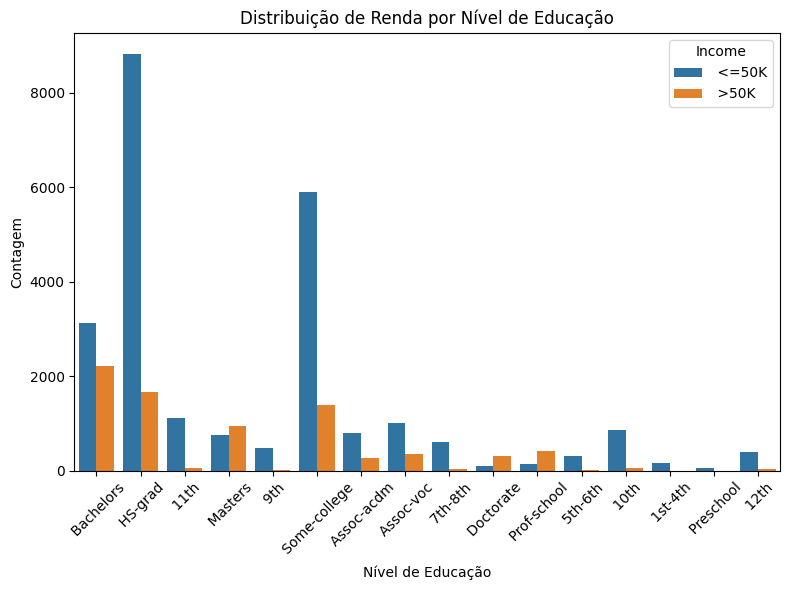

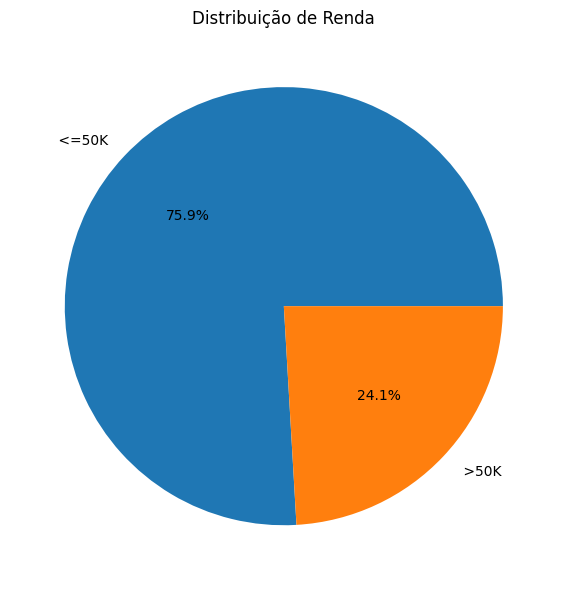

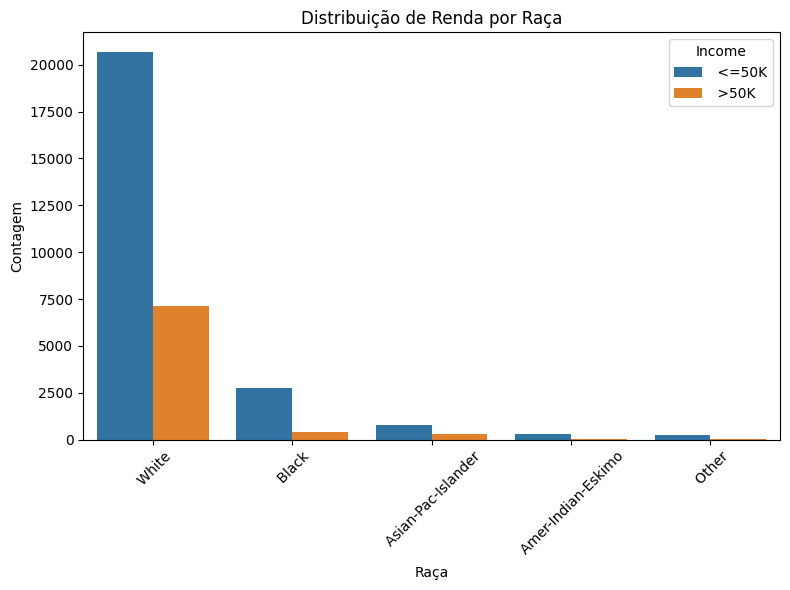

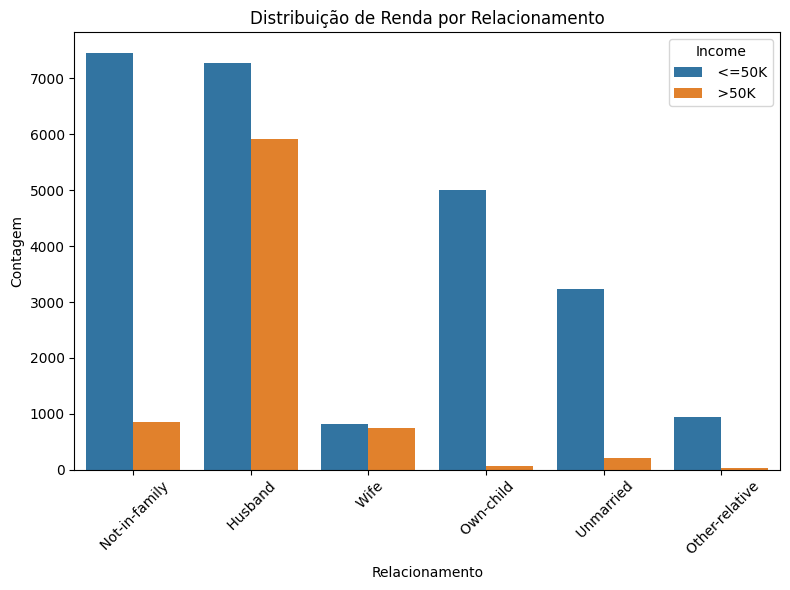

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Barras (Barplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Distribuição de Renda por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Gráfico de Pizza (Pie Chart)
plt.figure(figsize=(8, 6))
data['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição de Renda')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Gráfico de Setores Empilhados (Stacked Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='income', data=data)
plt.title('Distribuição de Renda por Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Gráfico de Contagem por Categoria (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='relationship', hue='income', data=data)
plt.title('Distribuição de Renda por Relacionamento')
plt.xlabel('Relacionamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()


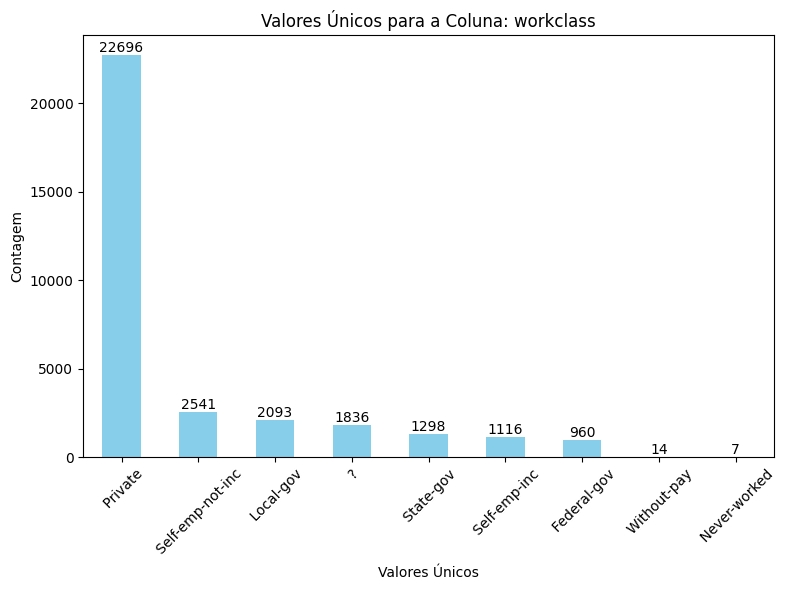

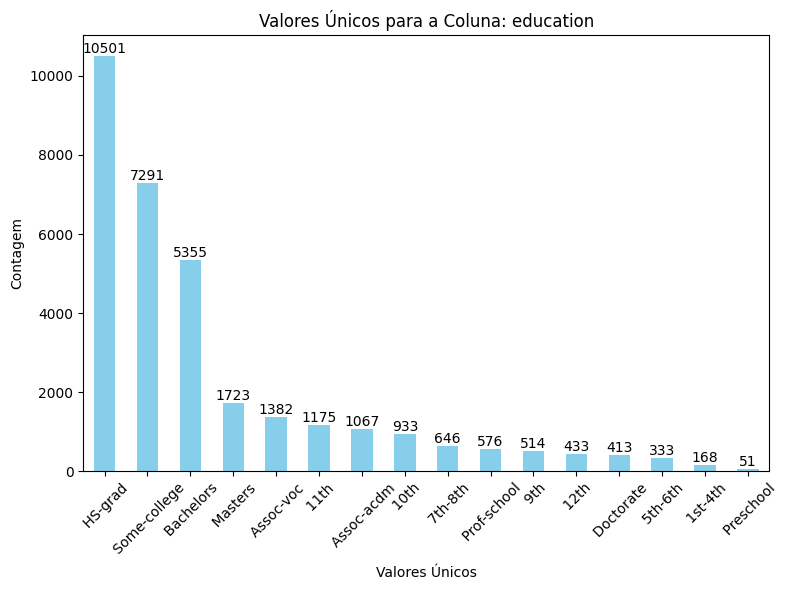

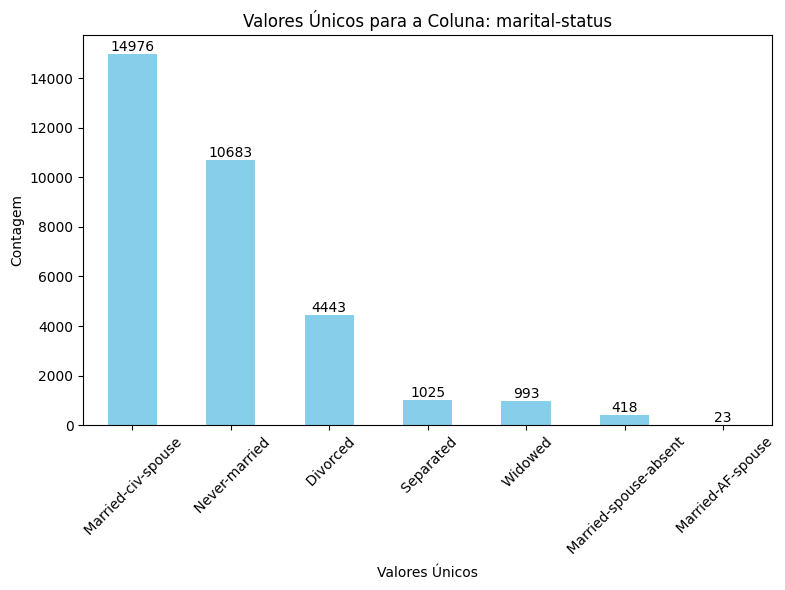

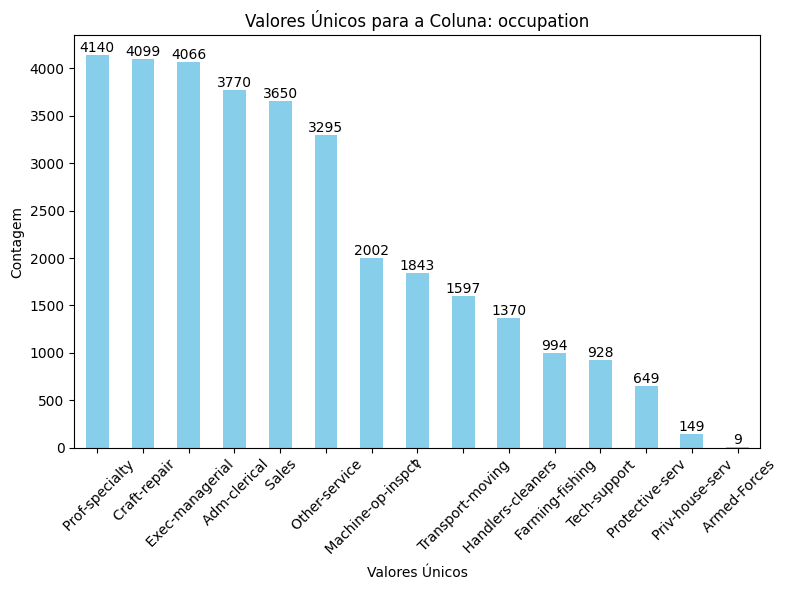

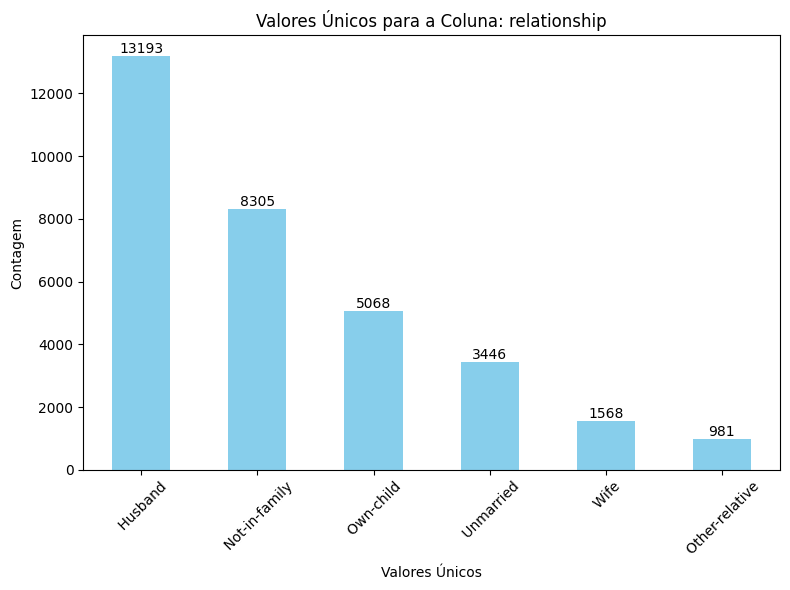

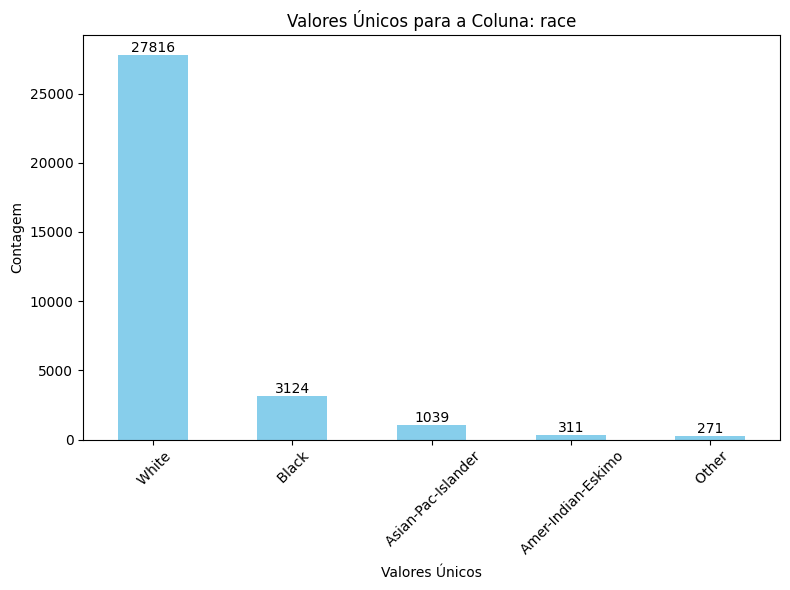

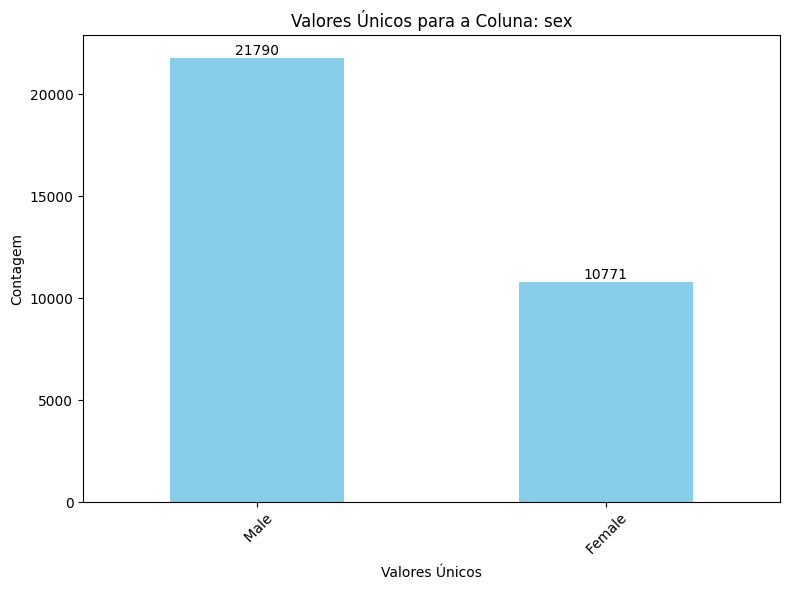

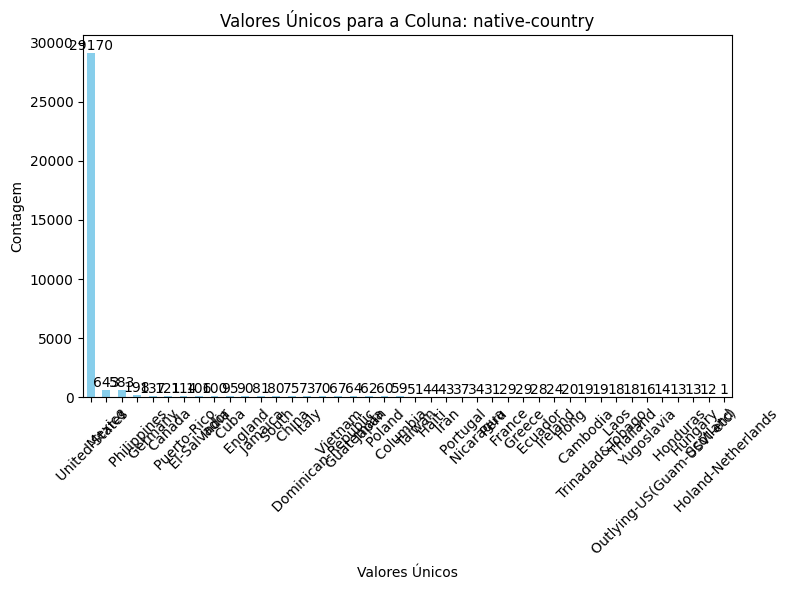

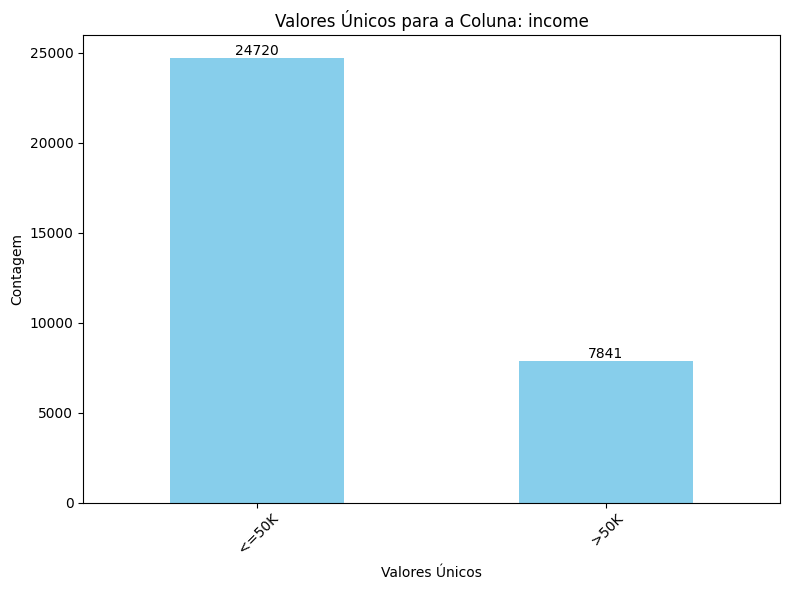

In [21]:
categorical_columns = data.select_dtypes(include=['object'])

# Gerar um gráfico para cada coluna categórica mostrando os valores únicos
for column in categorical_columns.columns:
    unique_values_count = categorical_columns[column].nunique()
    plt.figure(figsize=(8, 6))
    value_counts = categorical_columns[column].value_counts()
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Valores Únicos para a Coluna: {column}')
    plt.xlabel('Valores Únicos')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)

    # Adicionando a quantidade de valores únicos no topo de cada barra
    for i in range(len(value_counts)):
        plt.text(i, value_counts[i] + 0.5, str(value_counts[i]), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

## Gráficos com Atributos Numéricos

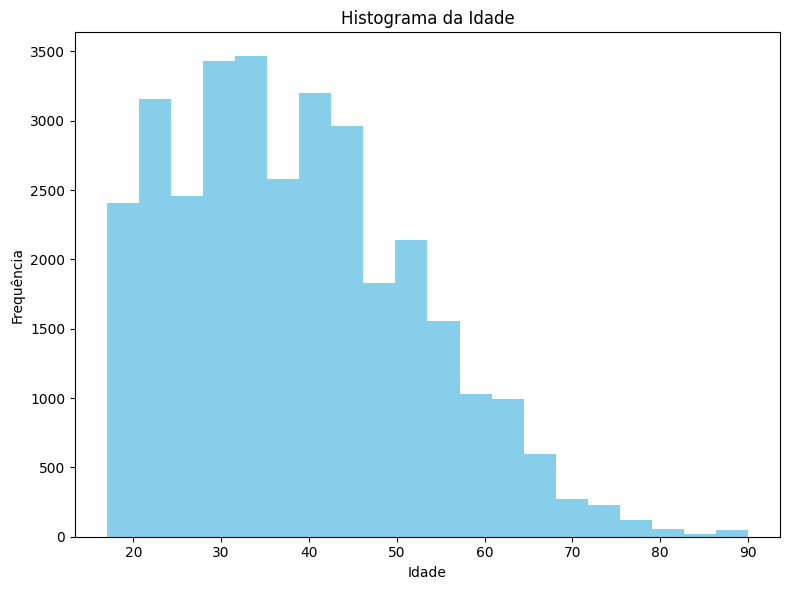

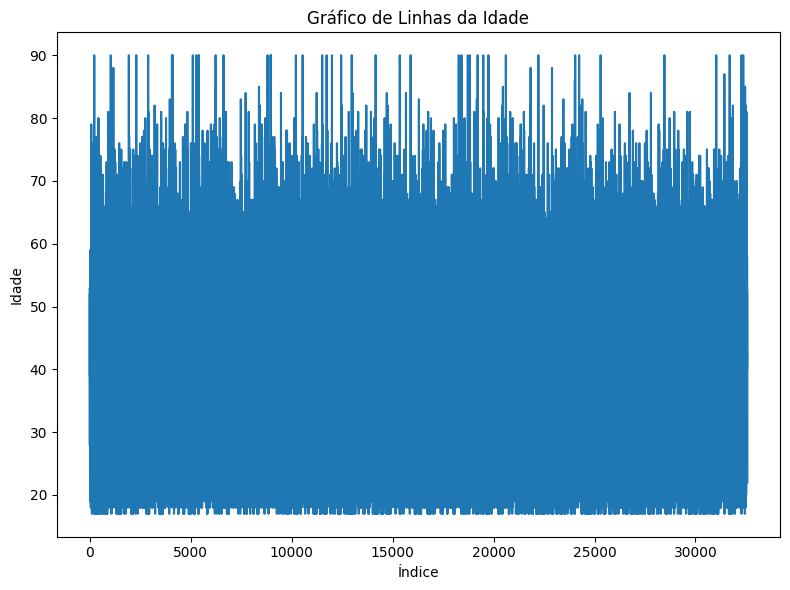

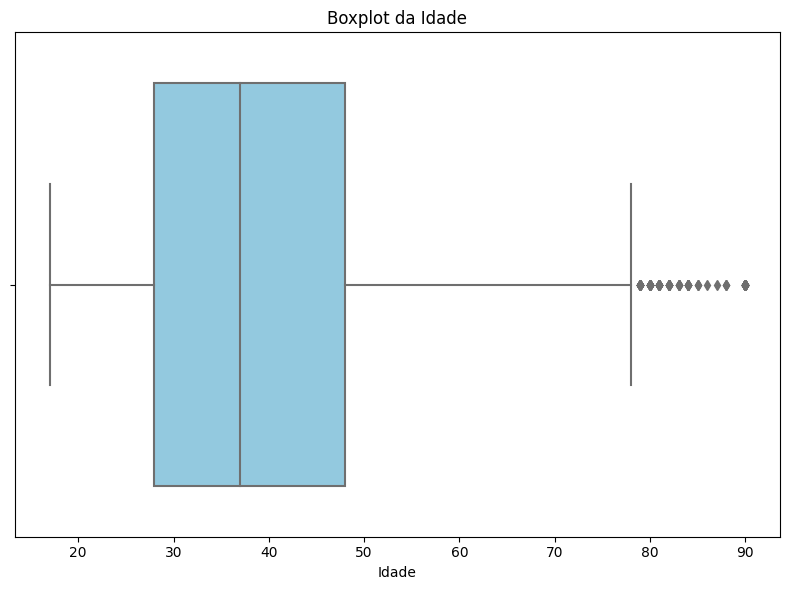

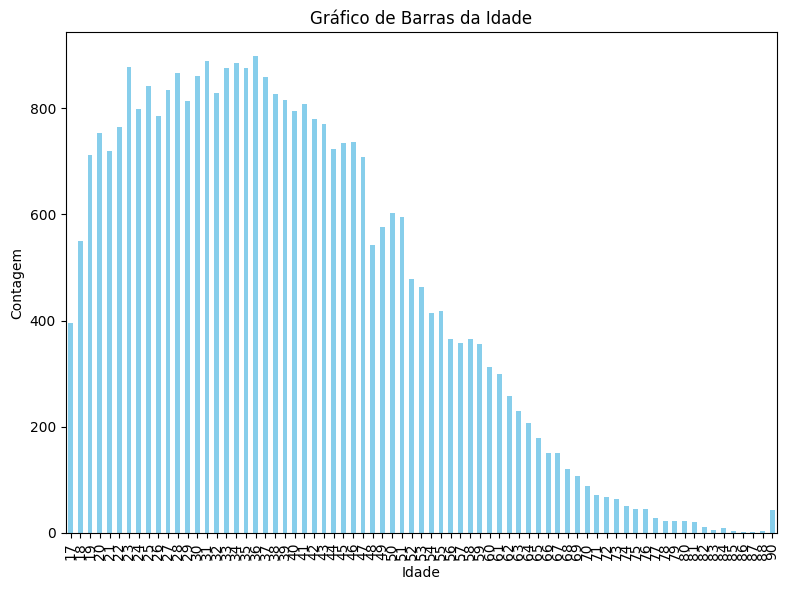

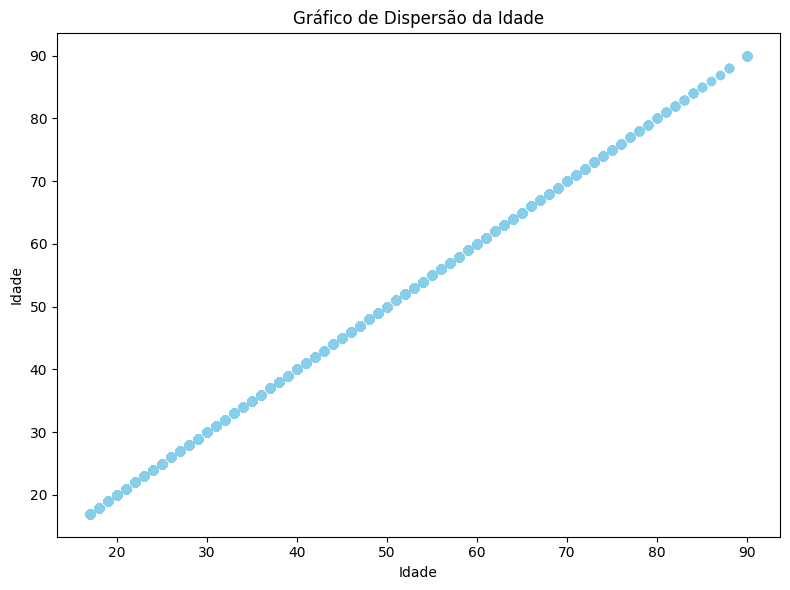

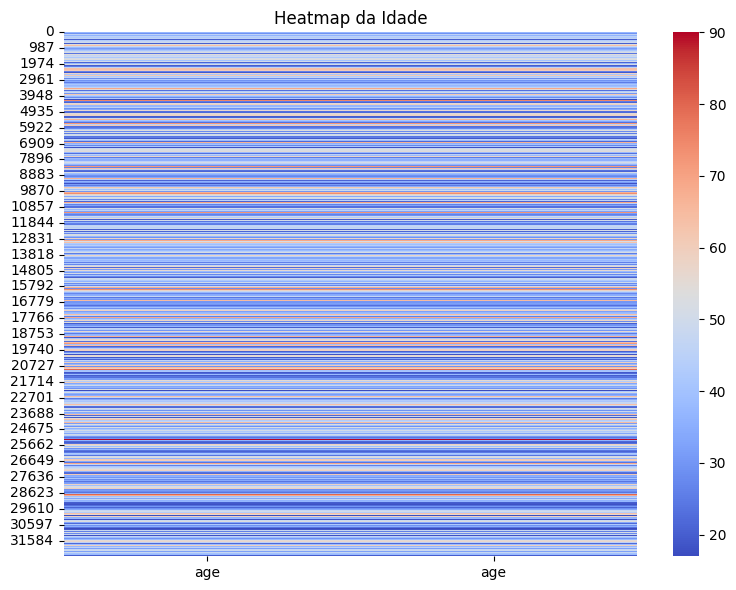

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Gráfico de Linhas (não ideal para 'age', mas pode ser uma linha horizontal)
plt.figure(figsize=(8, 6))
plt.plot(data['age'])
plt.title('Gráfico de Linhas da Idade')
plt.xlabel('Índice')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'], color='skyblue')
plt.title('Boxplot da Idade')
plt.xlabel('Idade')
plt.tight_layout()
plt.show()

# Gráfico de Barras (não é o ideal para 'age')
plt.figure(figsize=(8, 6))
data['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras da Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Gráfico de Dispersão (não é o ideal para 'age' em relação a ele mesmo)
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['age'], color='skyblue')
plt.title('Gráfico de Dispersão da Idade')
plt.xlabel('Idade')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

# Heatmap (não é ideal para 'age' em relação a ele mesmo)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['age', 'age']], cmap='coolwarm')
plt.title('Heatmap da Idade')
plt.tight_layout()
plt.show()

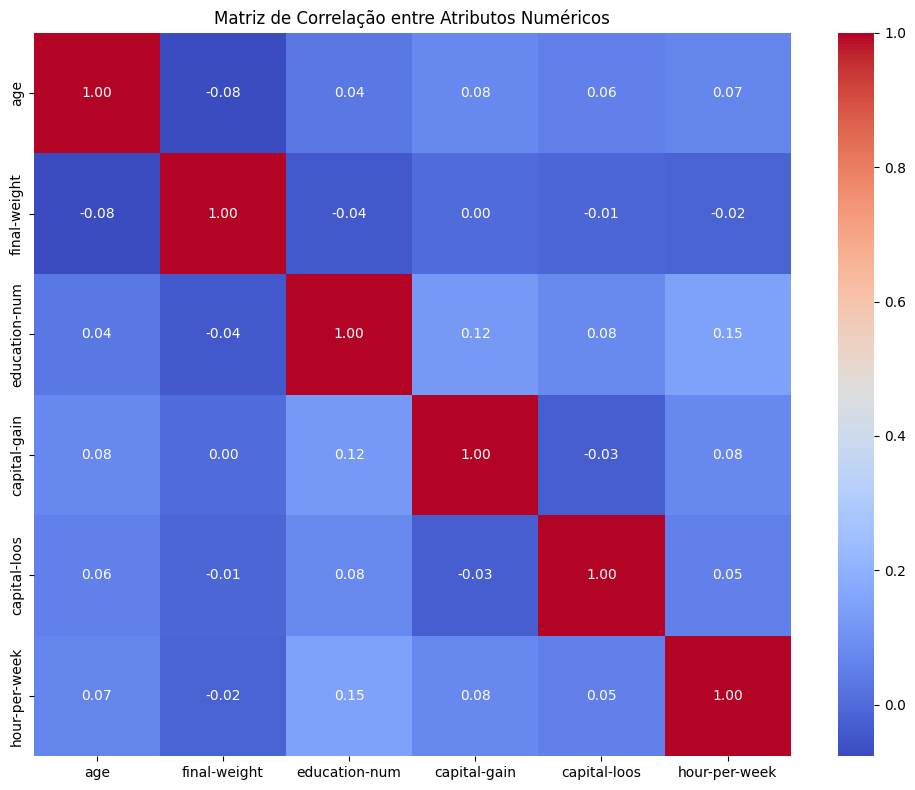

In [23]:
import seaborn as sns

# Selecionando apenas os atributos numéricos
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Atributos Numéricos')
plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px

# Criando o gráfico de dispersão dinâmico
fig = px.scatter(data, x='age', y='income', color='income')
fig.update_layout(title='Gráfico de Dispersão entre Idade e Renda (Income)',
                  xaxis_title='Idade',
                  yaxis_title='Renda (Income)')
fig.show()

In [25]:
import plotly.express as px

# Filtrando apenas as pessoas do gênero masculino
data_male = data[data['sex'] == ' Male']

# Criando o gráfico de dispersão dinâmico
fig = px.scatter(data_male, x='age', y='capital-gain', color='sex')
fig.update_layout(title='Gráfico de Dispersão entre Idade e Ganho de Capital (Apenas Homens)',
                  xaxis_title='Idade',
                  yaxis_title='Ganho de Capital')
fig.show()